# Importing Libraries

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# EDA

In [2]:
sales_df = pd.read_csv(r"C:\Users\Kashsih Taneja\Downloads\sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [3]:
stock_df = pd.read_csv(r"C:\Users\Kashsih Taneja\Downloads\sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [4]:
temp_df = pd.read_csv(r"C:\Users\Kashsih Taneja\Downloads\sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [5]:
sales_df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [6]:
stock_df.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [7]:
temp_df.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


In [8]:
import seaborn as sns

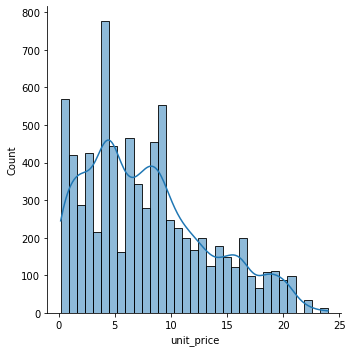

In [9]:
sns.displot(sales_df,x='unit_price',kde = True, height= 5, aspect = 1)

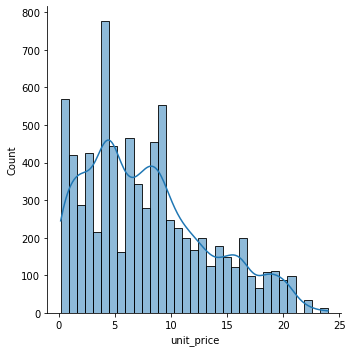

In [10]:
sns.displot(sales_df,x='unit_price',kde = True, height= 5, aspect = 1)

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [13]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


# Data cleaning

In [14]:
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [15]:
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [16]:
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [17]:
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp']).dt.round('H')

In [18]:
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp']).dt.round('H')

In [19]:
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp']).dt.round('H')

# Merge Data

In [20]:
sales_agg = sales_df.groupby(['timestamp','product_id']).agg({'quantity' : 'sum'}).reset_index()

In [21]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct' : 'mean'}).reset_index()

In [22]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature':'mean'}).reset_index()

In [23]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')

In [24]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')

In [25]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)

In [26]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()
product_categories

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [27]:
product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [28]:
merged_df = merged_df.merge(product_price, on='product_id', how='left')

In [29]:
merged_df = merged_df.merge(product_categories, on='product_id', how='left')

# Feature Engeering 

In [30]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,category,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,11.19,kitchen,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,1.49,vegetables,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,14.19,baby products,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,20.19,beverages,1,1,9
4,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,4.99,spices and herbs,1,1,9


In [31]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.192988,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.192988,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.192988,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.192988,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0ec3890d-f4be-48a4-9358-291b3da7f578,0.92,0.0,-0.192988,4.99,1,1,9,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.192988,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.192988,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.192988,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.192988,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.92,0.0,-0.192988,4.99,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
x = merged_df[["quantity", "temperature","unit_price","timestamp_hour"]]
y = merged_df['estimated_stock_pct']

# Data Modelling

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [36]:
model = RandomForestRegressor()
scaler = StandardScaler()
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size= 0.2, random_state=40)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
trained_model = model.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

In [42]:
mae

0.2425085155581227

In [46]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred_lr = regressor.predict(X_test)

In [47]:
y_pred_lr

array([0.50059728, 0.51170823, 0.49683746, ..., 0.50081889, 0.50724425,
       0.5014998 ])

In [48]:
mae_1 = mean_absolute_error(y_true=y_test, y_pred=y_pred_lr)
mae_1

0.2174460310721794